In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pybedtools
import pandas as pd
from tqdm import tqdm
import dill as pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_style('white')
sns.set_context("paper", font_scale = 3)
new_rc_params = {
    'text.usetex': False,
    'svg.fonttype': 'none',
    'figure.figsize': (20, 10),
    'font.family': 'Helvetica',
}
matplotlib.rcParams.update(new_rc_params)


In [4]:
def process_loop_catalog_dataset(dataset_path):
    """
    Process the loop catalog dataset to extract relevant columns and convert them to a PyRanges object.
    """
    df = pd.read_csv(dataset_path, compression='gzip', header=None, sep='\t')
    extra = df[3].str.split(r',|:|-', expand=True)
    df = pd.concat([df.drop(columns=[3]), extra], axis=1)
    return df

In [5]:
def calc_overlap_proportions (dataset, col1, col2, type, save=False, prefix=""):
    overlaps = []
    overlaps_scores_1 = []
    overlaps_scores_2 = []
    n_1 = []
    n_2 = []
    for i in tqdm(range(min(len(dataset),100))):
        try:
            df_1 = process_loop_catalog_dataset(dataset.loc[i, col1])
                
            pbt_1 = pybedtools.BedTool.from_dataframe(df_1)
            n_1.append(len(pbt_1))

            df_2 = process_loop_catalog_dataset(dataset.loc[i, col2])
        
            pbt_2 = pybedtools.BedTool.from_dataframe(df_2)
            n_2.append(len(pbt_2))

            overlap_1 = pbt_2.pair_to_pair(pbt_1, type=type).to_dataframe(disable_auto_names=True, header=None)

            overlaps_scores_1.append(overlap_1.iloc[:,13])
            overlaps_scores_2.append(overlap_1.iloc[:,6])
            #print(f"Overlap {i}: {overlap_1}")
            overlaps.append(overlap_1)
        except:
            overlaps.append(pd.DataFrame())
            overlaps_scores_1.append(pd.Series())
            overlaps_scores_2.append(pd.Series())
            n_1.append(0)
            n_2.append(0)
            continue

    #dataset[f'overlaps_{type}'] = overlaps
    #dataset[f'n_{1}'] = n_1
    #dataset[f'n_{2}'] = n_2

    if save:
        outfile = f"{prefix}_overlaps_{col1.replace(" ", "_")}_{col2.replace(" ", "_")}_{type}.pickle"
        pickle.dump((overlaps, n_1, n_2, overlaps_scores_1, overlaps_scores_2),  open(outfile, "wb"))

    return overlaps, n_1, n_2, overlaps_scores_1, overlaps_scores_2
    

In [30]:
hiccup_dataset = pd.read_csv('./LoopCatalog_1kb_5kb_Hiccups.csv')
hiccup_dataset["normalization"] = hiccup_dataset["Primary Name"].str.split('(',expand=True)[1].str.rstrip(')')

#hiccup_overlaps, hiccup_n_1, hiccup_n_2, hiccup_overlaps_scores_1, hiccup_overlaps_scores_2 = calc_overlap_proportions(hiccup_dataset, '1kb HiC Longrange', '5kb HiC Longrange', 'either')

In [6]:
fithic_dataset = pd.read_csv('./LoopCatalog_FitHiChip.csv')

fithic_dataset["normalization"] = fithic_dataset["Primary Name"].str.split('(',expand=True)[1].str.rstrip(')')

In [29]:
with open("/Users/amulyagarimella/Documents/2241finalproject/either_hiccups.pickle", "rb") as f:
    hiccup_overlaps, hiccup_n_1, hiccup_n_2, hiccup_overlaps_scores_1, hiccup_overlaps_scores_2 = pickle.load(f)

In [7]:
fh_1_5_overlaps, fh_1_5_n_1, fh_1_5_n_2, fh_1_5_overlaps_scores_1, fh_1_5_overlaps_scores_2 = calc_overlap_proportions(fithic_dataset, '5kb FH Longrange (Unfiltered)', '10kb FH Longrange (Unfiltered)', 'either', save=False, prefix="fithic")

100%|██████████| 100/100 [08:31<00:00,  5.11s/it]


In [26]:
fh_10_25_overlaps, fh_10_25_n_1, fh_10_25_n_2, fh_10_25_overlaps_scores_1, fh_10_25_overlaps_scores_2 = calc_overlap_proportions(fithic_dataset, '10kb FH Longrange (Unfiltered)', '25kb FH Longrange (Unfiltered)', 'either', save=False, prefix="fithic")

100%|██████████| 100/100 [12:32<00:00,  7.52s/it]


In [ ]:
overlaps, n_1, n_2, overlaps_scores_1, overlaps_scores_2 = calc_overlap_proportions(fithic_dataset, '10kb FH Longrange (Unfiltered)', '25kb FH Longrange (Unfiltered)', 'either', save=True, prefix="fithic")

In [ ]:
overlaps

In [16]:
fh_1_5_overlaps[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,chr1,770000,780000,chr1,850000,860000,2.05586,chr1,775000,780000,chr1,855000,860000,2.13082,NaN,NaN,NaN
1,chr1,770000,780000,chr1,850000,860000,2.05586,chr1,855000,860000,chr1,775000,780000,2.13082,NaN,NaN,NaN
2,chr1,850000,860000,chr1,770000,780000,2.05586,chr1,855000,860000,chr1,775000,780000,2.13082,NaN,NaN,NaN
3,chr1,850000,860000,chr1,770000,780000,2.05586,chr1,775000,780000,chr1,855000,860000,2.13082,NaN,NaN,NaN
4,chr1,900000,910000,chr1,1270000,1280000,2.00755,chr1,900000,905000,chr1,1315000,1320000,3.53839,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847583,chrY,21060000,21070000,chrY,20960000,20970000,3.86036,chrY,20960000,20965000,chrY,21060000,21065000,3.70252,NaN,NaN,NaN
14847584,chrY,21060000,21070000,chrY,20980000,20990000,2.34963,chrY,21060000,21065000,chrY,20960000,20965000,3.70252,NaN,NaN,NaN
14847585,chrY,21060000,21070000,chrY,20980000,20990000,2.34963,chrY,21060000,21065000,chrY,20960000,20965000,3.70252,NaN,NaN,NaN
14847586,chrY,21060000,21070000,chrY,21040000,21050000,5.26865,chrY,21060000,21065000,chrY,20960000,20965000,3.70252,NaN,NaN,NaN


In [35]:
def prop_high_in_low (dataset, overlaps, n_1, n_2, idx=None):
    #if idx is None:
    #    idx = np.arange(0,len(dataset)-1)
    prop_overlapping = np.array([len(overlaps[i].iloc[:,[8,9,10,11,12,13]].drop_duplicates())/n_1[i] if (len(overlaps[i]) != 0 and n_1[i] != 0) else None for i in range(len(overlaps))]).astype(np.float64)

    #prop_overlapping = np.array([len(overlaps[i].iloc[:,[8,9,10,11,12,13]].drop_duplicates())/n_1[i] if (overlaps[i] is not None and n_1[i] is not None) else None for i in range(len(overlaps))]).astype(np.float64)

    print(min(prop_overlapping))
    print(max(prop_overlapping))
    print(np.nanmean(prop_overlapping))

    #valid_idx = ~np.isnan(prop_overlapping[idx])
    #filtered_props = prop_overlapping[idx][valid_idx]
    #filtered_hue = dataset["Std Sample Name"].iloc[idx][valid_idx]

    sns.histplot(x=prop_overlapping, palette="deep", linewidth=5, fill=True, alpha=0.5, bins=20, element="step")

    #plt.legend(bbox_to_anchor=(1.05, 1), loc=1,)
    # plt.tight_layout()
    plt.xlim(0, 1)

0.0006466760849234933
0.4366883815700736
0.21032752378309985


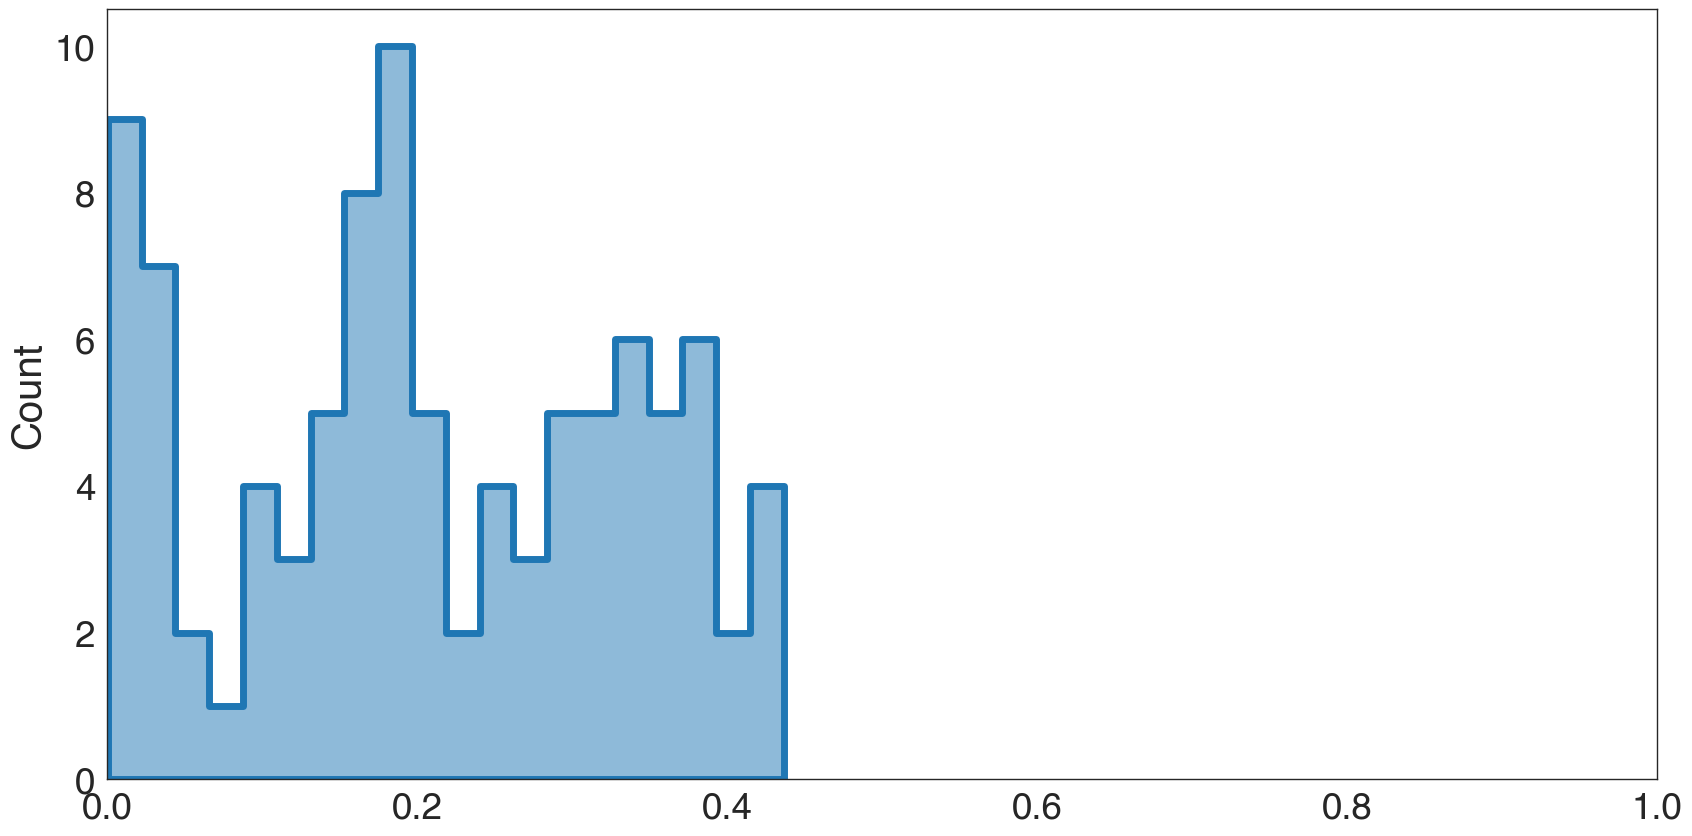

In [33]:
prop_high_in_low(hiccup_dataset, hiccup_overlaps, hiccup_n_1, hiccup_n_2)

0.946551724137931
0.9991150442477876
0.9861691188732805


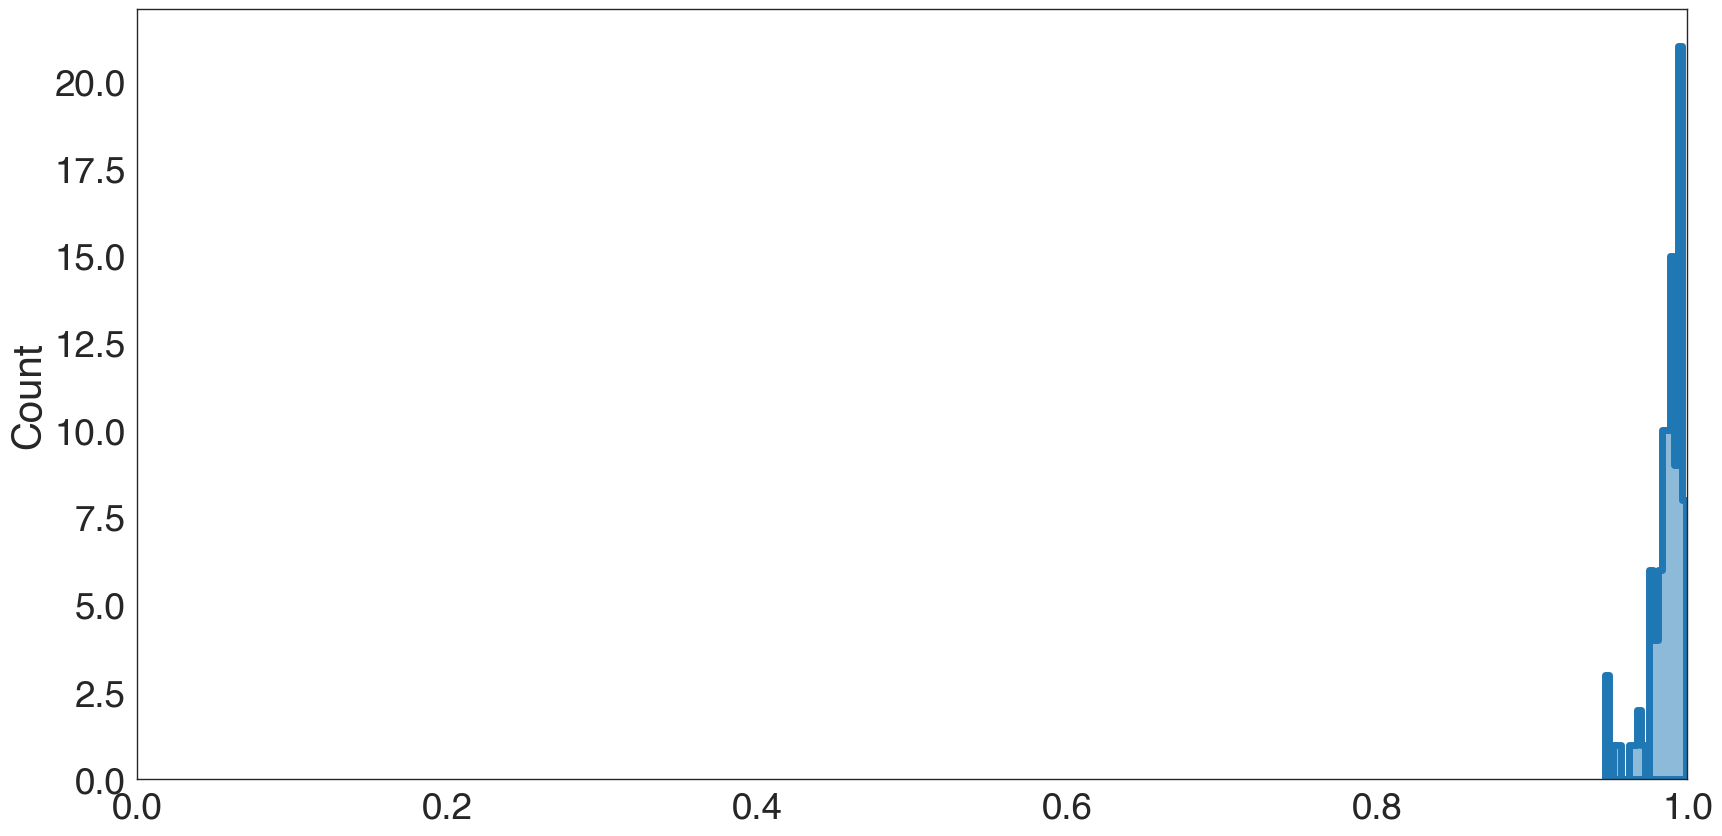

In [36]:
prop_high_in_low(fithic_dataset[:100], fh_1_5_overlaps, fh_1_5_n_1, fh_1_5_n_2)

0.943502824858757
0.9986658606986883
0.9859700204721965


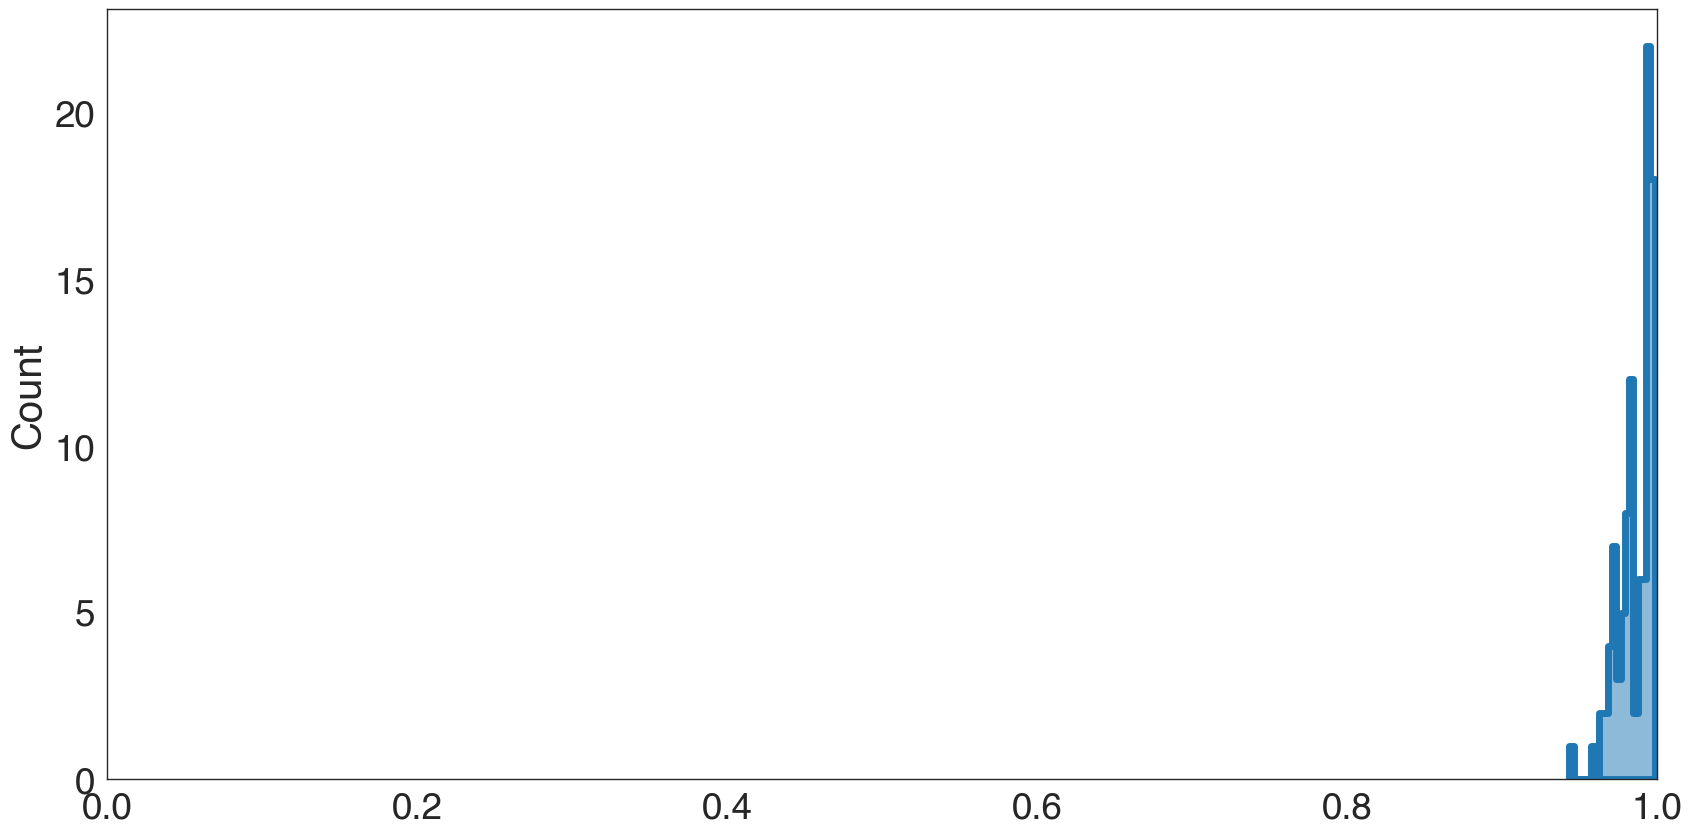

In [28]:
prop_high_in_low(fithic_dataset[:100], fh_10_25_overlaps, fh_10_25_n_1, fh_10_25_n_2)